# Bayesian Network 

### 0. Used libraries

In [265]:
# used libraries
import pandas as pd
import numpy as np
import cv2 
import sklearn
import os
import matplotlib.pyplot as plt
import math

## 1. Used functions in order they are called in the code

#### f_1 CSV Functioncs for getting row and column numbers

In [266]:
import csv

def get_csv_dimensions(csv_file_path):
    with open(csv_file_path, 'r') as file:
        csv_reader = csv.reader(file)
        num_rows = sum(1 for row in csv_reader)  # Anzahl der Zeilen
        file.seek(0)  # Zurücksetzen des Dateizeigers auf den Anfang der Datei
        header = next(csv_reader)
        num_columns = len(header)  # Anzahl der Spalten

    return num_rows, num_columns

#### f_2 CSV function for checking existence of elemnts in file

In [267]:
import csv

def check_csv_elements_exist(csv_file_path, row_index_lower, row_index_upper, col_index_lower, col_index_upper):
    missing_elements = []  # Liste zum Speichern der fehlenden Elemente
    
    with open(csv_file_path, 'r') as file:
        csv_reader = csv.reader(file)
        rows = list(csv_reader)
        
        for row_index in range(row_index_lower, row_index_upper-1):
            if row_index >= len(rows):
                missing_elements.append(row_index)  # Zeilenindex außerhalb des gültigen Bereichs
                continue
            
            row = rows[row_index]
            
            for col_index in range(col_index_lower, col_index_upper):
                if col_index >= len(row):
                    missing_elements.append((row_index, col_index))  # Spaltenindex außerhalb des gültigen Bereichs
                    continue
                
                element = row[col_index]
                if not element:
                    missing_elements.append((row_index, col_index))  # Element fehlt
        
        if missing_elements:
            return missing_elements  # Liste der fehlenden Elemente
        else:
            return True  # Alle Elemente existieren

#### f_3 Function for generating key metrics: confusin matrix, precision, recall, f1-score

In [268]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def key_metrics_generation(y_true, y_pred, title_cm, saving_file_path_cm):
    # Berechne die Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    # Berechne den Prozentsatz in der Confusion Matrix
    cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100

    # Ausgabe der Confusion Matrix
    print("Confusion Matrix:")
    print(cm)

    # Visualisierung der Confusion Matrix als Heatmap mit Prozentsätzen
    classes = np.unique(np.concatenate((y_true, y_pred)))
    plt.imshow(cm_percentage, interpolation='nearest', cmap=plt.cm.rainbow)
    plt.title(title_cm)
    plt.colorbar(label='Prozent')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Vorhersage')
    plt.ylabel('Wahre Werte')

    # Speichere die Confusion Matrix als Bild
    saving_file_path = os.path.join(saving_file_path_cm, title_cm)
    plt.savefig(saving_file_path)

    # Zeige die Confusion Matrix und die Metriken an
    plt.show()

    # Berechne die Precision, den Recall und den F1-Score
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Konvertiere die Metriken in Prozentsatz von 0 bis 100
    precision_percentage = precision * 100
    recall_percentage = recall * 100
    f1_percentage = f1 * 100

    # Ausgabe der Metriken als Prozentsatz
    print("Precision: {:.2f}%".format(precision_percentage))
    print("Recall: {:.2f}%".format(recall_percentage))
    print("F1-Score: {:.2f}%".format(f1_percentage))

# 1.0 Loading and checking CSV file containing image features for data frames

In [269]:
# getting size of CSV file
csv_file_path = r"C:\Users\SeppG\VdKI\00_project_abgabe\04_CSV\All_Labels_completed.csv"
num_rows, num_columns = get_csv_dimensions(csv_file_path)

# Ausgabe der Zeilen- und Spaltenanzahl
print("Anzahl der Zeilen:", num_rows)
print("Anzahl der Spalten:", num_columns)

# ckecking loaded elements
missing_elements = check_csv_elements_exist(csv_file_path, 0, num_rows, 0, num_columns)

# Ausgabe des Prüfergebnisses
if missing_elements == True:
    print("Alle Elemente im angegebenen Bereich existieren.")
else:
    print("Folgende Elemente im angegebenen Bereich fehlen:")
    for element in missing_elements:
        print("Zeilenindex:", element[0], "Spaltenindex:", element[1])

Anzahl der Zeilen: 2737
Anzahl der Spalten: 17
Alle Elemente im angegebenen Bereich existieren.


#### 1.1 Creating Test and Trainings data farmes

In [270]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Lade die CSV-Datei in einen DataFrame und verwende die erste Zeile als Header
data_frame = pd.read_csv(csv_file_path, header=0)

target_column = 'label'
feature_columns = ['con_num', 'con_area', 'orb_num_front', 'orb_num_back', 'cs_green', 'cs_yellow', 'cs_white', 'cs_purple', 'cs_red', 'cs_blue', 'cs_brown',
                    'mod_length', 'mod_length_wo_white', 'mod_area', 'mod_area_wo_white']  # Liste der aller Featurespalten
feature_columns = [ 'con_num', 'con_area', 'orb_num_front', 'orb_num_back', 'cs_green', 'cs_yellow', 'cs_white', 'cs_purple', 'cs_red', 'cs_blue', 'cs_brown'] # Liste der gewählten Featurespalten


# Extrahiere die Zielvariable y_all und die Features x_all aus dem DataFrame
y_all = data_frame[target_column]
x_all = data_frame.loc[:, feature_columns]

# Teile die Daten in Trainings- und Testdaten auf
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.2 ) # random_state=1

print("Shape von y_train:", y_train.shape)
print("Shape von x_train:", x_train.shape)
print("test data number X: " ,x_train.shape[0], " and number Y: ",y_train.shape[0] )
print("test data number X: " ,x_test.shape[0], " and number Y: ",y_test.shape[0] )


Shape von y_train: (2188,)
Shape von x_train: (2188, 11)
test data number X:  2188  and number Y:  2188
test data number X:  547  and number Y:  547


# 2.0 Bayesian network training and evaluation

## 2.1.1 Bayesian network from sklearn library

In [271]:
from sklearn.naive_bayes import GaussianNB
# Erstelle und trainiere den Gaussian Naive Bayes Klassifikator mit den Trainingsdaten
bayes_classifier = GaussianNB()
bayes_classifier.fit(x_train, y_train)

# Evaluierung des Modells mit den Testdaten
accuracy = bayes_classifier.score(x_test, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.4936014625228519


#### 2.1.2 Saving Bayesian network and testing the save network

In [272]:
import pickle

# Speichere das trainierte Modell
saving_file_path_bayesian_network = r'C:\Users\SeppG\VdKI\00_project_abgabe\03_kis\01_bayes\bayesian_network_testing_1.pkl'
with open(saving_file_path_bayesian_network, 'wb') as file:
    pickle.dump(bayes_classifier, file)

# Lade das trainierte Modell aus der Datei
loaded_bayes_classifier = pickle.load(open(saving_file_path_bayesian_network, 'rb'))

# Evaluierung des gespeicherten Modells mit den Testdaten
accuracy = loaded_bayes_classifier.score(x_test, y_test)
print("Accuracy: ", accuracy)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))


Accuracy:  0.4936014625228519
Accuracy: 49.36%


Confusion Matrix:
[[30  3  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 12  2  4  1  1  0  0  0  0  0  0  0  0  0]
 [ 0 12  6 12  4  5  1  0  1  0  0  0  0  0  0]
 [ 0  2  4  5  7  4  0  0  1  0  0  0  0  0  0]
 [ 0  1  2  2 13 14  8  0  0  1  1  0  1  0  0]
 [ 0  3  1  3  5 23  5  1  3  1  0  1  1  0  0]
 [ 0  0  1  0  5  3 20  1  0  3  1  0  1  0  0]
 [ 0  0  0  0  1  1 12  0  9  5  0  0  6  0  0]
 [ 0  0  0  0  2  3  2  0 18  5  0  0  1  0  0]
 [ 0  0  0  0  2  0  1  1  1 20  0  0  6  1  0]
 [ 0  0  0  0  0  1  1  0  1  3 25  7  8  0  0]
 [ 0  0  0  0  1  0  1  0  2  1  7  9 10  2  3]
 [ 0  0  0  0  0  2  3  0  1  0  2  3 30  8  1]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  2 32  3]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  6 27]]


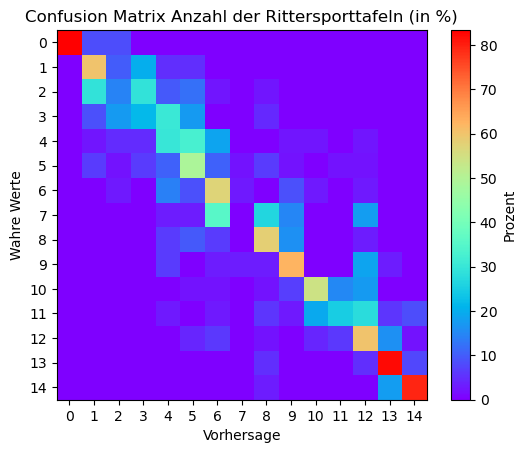

Precision: 47.51%
Recall: 49.36%
F1-Score: 47.37%


In [273]:
saving_file_path_confusionmatrix_bn_lib = r'C:\Users\SeppG\VdKI\00_project_abgabe\03_kis\01_bayes'
y_predictions_bn_lib = loaded_bayes_classifier.predict(x_test)
title_cm = 'Confusion Matrix Anzahl der Rittersporttafeln (in %)'

key_metrics_generation(y_test, y_predictions_bn_lib, title_cm, saving_file_path_confusionmatrix_bn_lib)



## 2.2.1 Bayesian network self coded

In [274]:
import numpy as np
import math
import pandas as pd
import os

import numpy as np

def cholesky_inverse(matrix):
    # Cholesky-Zerlegung
    L = np.linalg.cholesky(matrix)
    
    # Inverse der unteren Dreiecksmatrix
    L_inv = np.linalg.inv(L)
    
    # Inverse der Matrix durch Rücktransformation
    matrix_inv = np.dot(L_inv.T, L_inv)
    
    return matrix_inv

class Bayes:
    def __init__(self):
        # Initialize dictionaries to store mean, inverse covariance matrices, and determinant of covariance matrices
        self.mean_values = {}
        self.inverse_covariance_matrices = {}
        self.determinants_of_covariance_matrices = {}
               
    def fit(self, features, classes):
        # Get unique classes
        unique_classes = classes.unique()
        num_columns = len(features.columns)

        for class_label in unique_classes:
            # Filter features belonging to the current class
            features_of_class = features[classes == class_label]
            mean_values = []
            
            # Calculate the MEAN value for each column
            for column in range(num_columns):
                mean_value = 1 / len(features_of_class) * sum(features_of_class.iloc[:, column])
                mean_values.append(mean_value)

            # Calculate the COVARIANCE matrix
            covariance_matrix = []
            for row in range(num_columns): # covaraiance matrix size is number of classes x number of classes
                covariance_matrix_row = []
                for column in range(num_columns):
                    # Calculate the sum of elements for each cell in the covariance matrix
                    element_sum = sum((features_of_class.iloc[:, row] - mean_values[row]) * (features_of_class.iloc[:, column] - mean_values[column]))
                    cm_row = 1 / len(features_of_class) * element_sum
                    covariance_matrix_row.append(cm_row)
                covariance_matrix.append(covariance_matrix_row)

            # Calculate the INVERSE of the COVARIANCE matrix and its determinant
            inverse_covariance_matrix = cholesky_inverse(covariance_matrix)
            determinant_of_covariance_matrix = np.linalg.det(covariance_matrix)

            # Store the mean, inverse covariance matrix, and determinant of covariance matrix for the current class
            self.mean_values[class_label] = mean_values
            self.inverse_covariance_matrices[class_label] = inverse_covariance_matrix
            self.determinants_of_covariance_matrices[class_label] = determinant_of_covariance_matrix
            
    def save(self, path):
        # Save the trained model data to files
        np.save(os.path.join(path, 'inverse_covariance_matrices.npy'), self.inverse_covariance_matrices)
        np.save(os.path.join(path, 'determinants_of_covariance_matrices.npy'), self.determinants_of_covariance_matrices)
        np.save(os.path.join(path, 'mean_values.npy'), self.mean_values)
    
    def load(self, path):
        # Load the trained model data from files
        self.inverse_covariance_matrices = np.load(os.path.join(path, 'inverse_covariance_matrices.npy'), allow_pickle=True).item()
        self.determinants_of_covariance_matrices = np.load(os.path.join(path, 'determinants_of_covariance_matrices.npy'), allow_pickle=True).item()
        self.mean_values = np.load(os.path.join(path, 'mean_values.npy'), allow_pickle=True).item()
        
    def predict(self, x_test):
        predictions = []
        probability_list = []
        for i in range(len(x_test)):
            probability_densities = []
            classes = self.mean_values.keys()
            for class_label in classes:
                # Calculate the probability density for each class using the Gaussian distribution formula
                feature_vector = np.array(x_test.iloc[i, :])
                difference = feature_vector - self.mean_values[class_label] # difference between testing feature and mean value if the feature
                result = np.dot(difference.T, np.dot(self.inverse_covariance_matrices[class_label], difference)) # dotproduct( transposed difference matrix and (dotproduct of the inverse covariance matrix and difference matrix#) (dotproduct=skalarprodukt)
                # PDF(x) = (1 / ((2 * π)^(d/2) * |Σ|^(1/2))) * exp(-0.5 * (x - μ)ᵀ * Σ^(-1) * (x - μ))
                # PDF(x) = (factor_1 * factor_2) * factor_3
                # PDF(x): Die Wahrscheinlichkeitsdichtefunktion für den Vektor x.
                # d: Die Dimension des Merkmalsvektors (Anzahl der Merkmale).
                # π: Die Kreiszahl Pi.
                # |Σ|: Die Determinante der Kovarianzmatrix Σ.
                # μ: Der Mittelwert (Vektor) der multivariaten Normalverteilung.
                # Σ: Die Kovarianzmatrix der multivariaten Normalverteilung.
                # ᵀ: Das Transponieren des Vektors oder der Matrix.
                # Σ^(-1): Die Inverse der Kovarianzmatrix Σ.
                # exp(): Die Exponentialfunktion.
                factor_1 = 1 / ((2 * math.pi) ** (0.5 * len(self.mean_values[class_label])))
                factor_2 = self.determinants_of_covariance_matrices[class_label] ** 0.5
                factor_3 = math.exp(-0.5 * result)
                probability_densities.append(factor_1 * factor_2 * factor_3)

            # Normalize the probabilities to ensure they form a valid probability distribution
            probability_densities_sum = sum(probability_densities)
            probabilities = [probability_densities[i] * 1 / len(self.mean_values) / probability_densities_sum for i in range(len(self.mean_values))]
            highest_index = max(range(len(probabilities)), key=probabilities.__getitem__)
            # Append the predicted class label and its corresponding probability to the result lists
            predictions.append(list(self.mean_values.keys())[highest_index])
            probability_list.append(probabilities[highest_index])
        return predictions

    def test_accuracy(self, predictions, y_test):
        predictions = pd.DataFrame(predictions, index=y_test.index, columns=["label"])
        y_test = y_test.to_frame()
        score = 0
        for index in y_test.index:
            row1 = predictions.loc[index]
            row2 = y_test.loc[index]
            # Check if the predicted class label matches the true class label
            score += int(row1[0] == row2[0])
        # Compute the accuracy score by dividing the total correct predictions by the number of samples
        accuracy = score / len(predictions)
        return accuracy



In [275]:
# Training and saving the bayesian network
model = Bayes()

model.fit(x_train, y_train)

model.save(r'C:\Users\SeppG\VdKI\00_project_abgabe\03_kis\01_bayes')

predictions_self_programmed = model.predict(x_test)

accuracy_self_programmed = model.test_accuracy(predictions_self_programmed, y_test)
print("Accuracy: ", accuracy_self_programmed)
accuracy_percentage_self_programmed = accuracy_self_programmed * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage_self_programmed))


Accuracy:  0.263254113345521
Accuracy: 26.33%


In [276]:
# loading and testing bayesian network
model_loaded = Bayes()

model_loaded.load(r'C:\Users\SeppG\VdKI\00_project_abgabe\03_kis\01_bayes')

predictions_self_programmed_2 = model.predict(x_test)

accuracy_self_programmed_2 = model_loaded.test_accuracy(predictions_self_programmed_2, y_test)
print("Accuracy: ", accuracy_self_programmed_2)
accuracy_percentage_self_programmed_2 = accuracy_self_programmed_2 * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage_self_programmed_2))

Accuracy:  0.263254113345521
Accuracy: 26.33%


Confusion Matrix:
[[30  3  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10  9  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  1 32  1  0  0  0  4  3  0  0  0  0  0  0]
 [ 0  0 16  4  0  0  0  1  2  0  0  0  0  0  0]
 [ 0  0 18  7  1  0  0  7 10  0  0  0  0  0  0]
 [ 0  1 18  6  1  0  0  3 18  0  0  0  0  0  0]
 [ 0  0  6  2  0  0  0 10 16  1  0  0  0  0  0]
 [ 0  0  1  2  0  0  0 10 21  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  2 26  0  0  0  0  0  0]
 [ 0  0  2  1  0  0  0 12 15  2  0  0  0  0  0]
 [ 0  0  1  0  0  0  0 11 27  1  4  2  0  0  0]
 [ 0  0  0  0  0  0  0  5 29  0  1  1  0  0  0]
 [ 0  0  3  4  0  0  0  6 35  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  6 16  0  1  0  0 14  2]
 [ 0  0  0  0  0  0  0  8 14  0  0  0  0  2 10]]


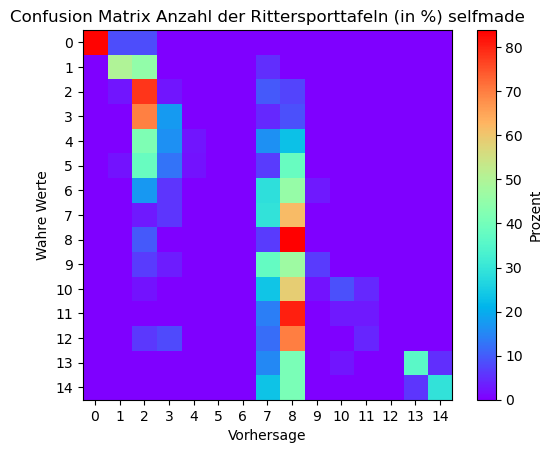

Precision: 38.34%
Recall: 26.33%
F1-Score: 22.98%


c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [277]:
saving_file_path_confusionmatrix_bn_programmed = r'C:\Users\SeppG\VdKI\00_project_abgabe\03_kis\01_bayes'
title_cm = 'Confusion Matrix Anzahl der Rittersporttafeln (in %) selfmade'

key_metrics_generation(y_test, predictions_self_programmed_2, title_cm, saving_file_path_confusionmatrix_bn_programmed)

Gründ der unterschiedlichen Ergebnisse:
Gaussian Naive Bayes-Klassifikators von scikit-learn hat wahrscheinlich eine andere Variante oder eine leicht modifizierte Version des Algorithmus verwendet

Implementierungsdetails: Die beiden Implementierungen können unterschiedliche Annahmen, Berechnungsmethoden oder Parameter haben. Unterschiede in der Art und Weise, wie die Features normalisiert oder die Wahrscheinlichkeiten geschätzt werden, können zu unterschiedlichen Vorhersagen führen. Numerische Stabilität ist im eigenen programmierten Bayesian network nicht beachtet, somit können Probleme bei der Inversen oder Teilen durch Null Probleme auftreten.

# 2.2.2 Bayesian Network with independence of feature probabilities

In [278]:
import numpy as np
import math
import pandas as pd
import os

import numpy as np

def cholesky_inverse(matrix):
    # Cholesky-Zerlegung
    L = np.linalg.cholesky(matrix)
    
    # Inverse der unteren Dreiecksmatrix
    L_inv = np.linalg.inv(L)
    
    # Inverse der Matrix durch Rücktransformation
    matrix_inv = np.dot(L_inv.T, L_inv)
    
    return matrix_inv

class Bayes_features_independent_probability:
    def __init__(self):
        # Initialize dictionaries to store mean and variance for each class
        self.mean_values = {}
        self.variance_values = {}
               
    def fit2(self, features, classes):
        # Get unique classes
        unique_classes = classes.unique()
        num_columns = len(features.columns)

        for class_label in unique_classes:
            # Filter features belonging to the current class
            features_of_class = features[classes == class_label]
            mean_values = []
            variance_values = []
            
            # Calculate the MEAN value and VARIANCE for each column
            for column in range(num_columns):
                mean_value = 1 / len(features_of_class) * sum(features_of_class.iloc[:, column])
                variance_value = 1 / len(features_of_class) * sum((features_of_class.iloc[:, column] - mean_value) ** 2)
                mean_values.append(mean_value)
                variance_values.append(variance_value)

            # Store the mean and variance for the current class
            self.mean_values[class_label] = mean_values
            self.variance_values[class_label] = variance_values
            
    def save2(self, path):
        # Save the trained model data to files
        np.save(os.path.join(path, 'mean_values.npy'), self.mean_values)
        np.save(os.path.join(path, 'variance_values.npy'), self.variance_values)
    
    def load2(self, path):
        # Load the trained model data from files
        self.mean_values = np.load(os.path.join(path, 'mean_values.npy'), allow_pickle=True).item()
        self.variance_values = np.load(os.path.join(path, 'variance_values.npy'), allow_pickle=True).item()
        
    def predict2(self, x_test):
        predictions = []
        probability_list = []
        for i in range(len(x_test)):
            probability_densities = []
            classes = self.mean_values.keys()
            for class_label in classes:
                # Calculate the probability density for each class assuming independent features
                feature_vector = np.array(x_test.iloc[i, :])
                probabilities = []
                for j in range(len(feature_vector)):
                    mean = self.mean_values[class_label][j]
                    variance = self.variance_values[class_label][j]
                    probability = 1 / (math.sqrt(2 * math.pi * variance)) * math.exp(-(feature_vector[j] - mean) ** 2 / (2 * variance))
                    probabilities.append(probability)
                probability_densities.append(np.prod(probabilities))

            # Normalize the probabilities to ensure they form a valid probability distribution
            probability_densities_sum = sum(probability_densities)
            probabilities = [probability_densities[i] * 1 / len(self.mean_values) / probability_densities_sum for i in range(len(self.mean_values))]
            highest_index = max(range(len(probabilities)), key=probabilities.__getitem__)
            # Append the predicted class label and its corresponding probability to the result lists
            predictions.append(list(self.mean_values.keys())[highest_index])
            probability_list.append(probabilities[highest_index])
        return predictions

    def test_accuracy2(self, predictions, y_test):
        predictions = pd.DataFrame(predictions, index=y_test.index, columns=["label"])
        y_test = y_test.to_frame()
        score = 0
        for index in y_test.index:
            row1 = predictions.loc[index]
            row2 = y_test.loc[index]
            # Check if the predicted class label matches the true class label
            score += int(row1[0] == row2[0])
        # Compute the accuracy score by dividing the total correct predictions by the number of samples
        accuracy = score / len(predictions)
        return accuracy



In [279]:
model_v2 = Bayes_features_independent_probability()


model_v2.fit2(x_train, y_train)

predictions_self_programmed2 = model_v2.predict2(x_test)

accuracy_self_programmed2 = model.test_accuracy(predictions_self_programmed2, y_test)
print("Accuracy: ", accuracy_self_programmed2)
accuracy_percentage_self_programmed2 = accuracy_self_programmed2 * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage_self_programmed2))

Accuracy:  0.5082266910420475
Accuracy: 50.82%


In [280]:
saving_file_path_confusionmatrix_bn_programmed = r'C:\Users\SeppG\VdKI\00_project_abgabe\03_kis\01_bayes'
title_cm = 'CM Anzahl der RT (in %) selfmade, feature independent '

key_metrics_generation(y_test, predictions_self_programmed2, title_cm, saving_file_path_confusionmatrix_bn_programmed)

Confusion Matrix:
[[30  3  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 12  2  4  2  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  6 11  3  4  1  0  2  0  0  0  0  0  0]
 [ 0  3  5  4  7  3  0  0  1  0  0  0  0  0  0]
 [ 0  1  3  1 19  9  7  1  0  1  1  0  0  0  0]
 [ 0  4  1  3  6 20  6  1  3  1  0  2  0  0  0]
 [ 0  1  1  0  5  1 21  1  0  3  1  0  1  0  0]
 [ 0  0  0  0  2  0 16  1  9  2  0  0  4  0  0]
 [ 0  0  0  0  3  2  3  0 18  5  0  0  0  0  0]
 [ 0  0  0  0  1  1  2  2  0 21  0  0  4  1  0]
 [ 0  0  0  0  0  1  1  0  1  4 30  3  6  0  0]
 [ 0  0  0  0  1  0  1  0  3  1  8 12  5  2  3]
 [ 0  0  0  0  0  2  3  0  1  3  2  4 27  5  3]
 [ 0  0  0  0  0  0  0  0  2  0  0  1  1 32  3]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  1  7 25]]


Precision: 50.43%
Recall: 50.82%
F1-Score: 49.37%


In [281]:
model_v2.save2(r'C:\Users\SeppG\VdKI\00_project_abgabe\03_kis\01_bayes')

# loading and testing bayesian network
model_v2_loaded = Bayes_features_independent_probability()

model_v2_loaded.load2(r'C:\Users\SeppG\VdKI\00_project_abgabe\03_kis\01_bayes')

predictions_self_programmed2 = model_v2_loaded.predict2(x_test)

accuracy_self_programmed2 = model_v2_loaded.test_accuracy2(predictions_self_programmed2, y_test)
print("Accuracy: ", accuracy_self_programmed2)
accuracy_percentage_self_programmed2 = accuracy_self_programmed2 * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage_self_programmed2))

Accuracy:  0.5082266910420475
Accuracy: 50.82%
